# Estructura FCC sin MD
## Empezamos por hacer nuestro modelo
Creamos nuestro modelo FCC de 10 capas, distancia interatómica de 2.78 Angstroms y hacemos un radcut de 15 A, y de igual manera lo visualizamos con jmol

In [2]:
from sys import path
import os
dir_actual = os.getcwd()
path.insert(0, 'C:/Users/guill/OneDrive/Documentos/Tesis/Proyect')

import myfuncions.core_shell_f as cs
import myfuncions.tools_f as tools
import subprocess as sbp

coords = cs.cubeShell(10,2.775,'fcc')
coords = cs.sphericalShave(coords,15)
atpos, eleList = cs.atpos_eleList_maker(coords,'Pt')
tools.show_percent(atpos,eleList)

name='FCC.xyz'
tools.wXYZ(atpos,name)

sbp.run(['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', name])

atomos totales : 959
Pt : 100.0 %, 959


CompletedProcess(args=['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', 'FCC.xyz'], returncode=0)

Aquí lo obtenido:
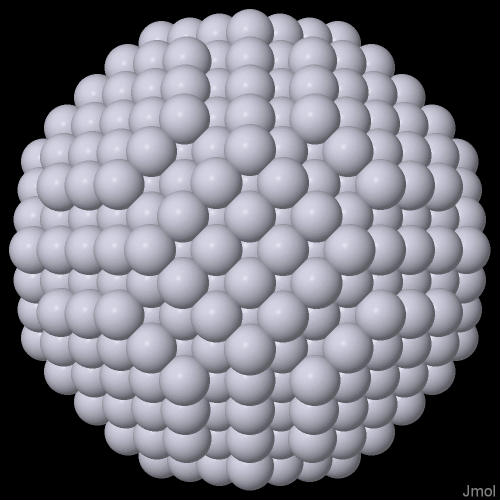
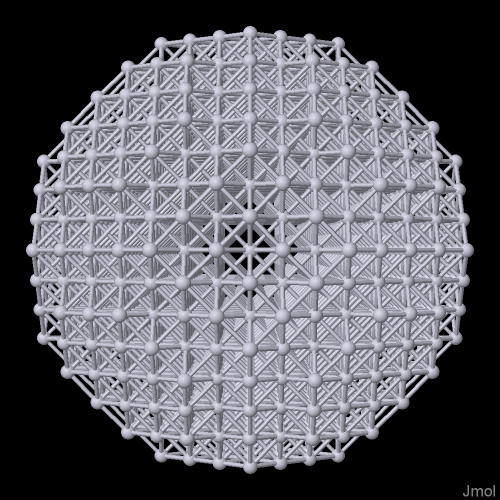

## Análisis del modelo
Se hace el análisis mostrado la distribución radial y fracción de atomos por radio

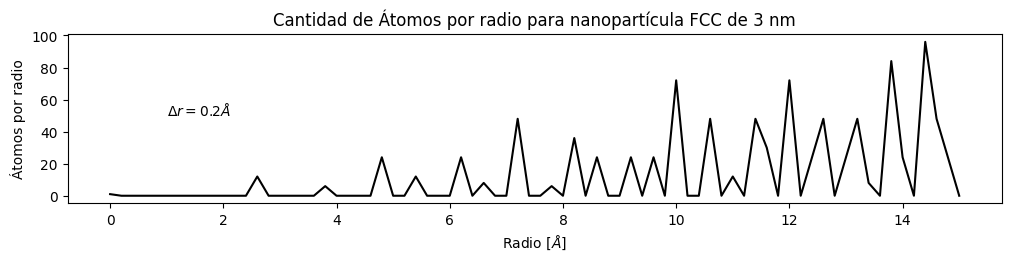

In [10]:
import myfuncions.graphs_f as myplt
import matplotlib.pyplot as plt
dr = 0.2
radios, fracc, conteo_total, conteo_interes = myplt.dump_fracc_atpr(atpos,'Pt',dr)
fig, ax =plt.subplots(figsize=(10,2.5), layout='constrained')
ax.plot(radios, conteo_total, label=('Atomos por radio'), color = 'black')
ax.set_xlabel('Radio [$\\AA$]')
ax.set_ylabel('Átomos por radio')
ax.set_title('Cantidad de Átomos por radio para nanopartícula FCC de 3 nm')
ypos_text = max(conteo_total)/2
ax.text(1,ypos_text,f'$\Delta r = {dr} \AA$', va='bottom')
#ax.legend()
plt.show()

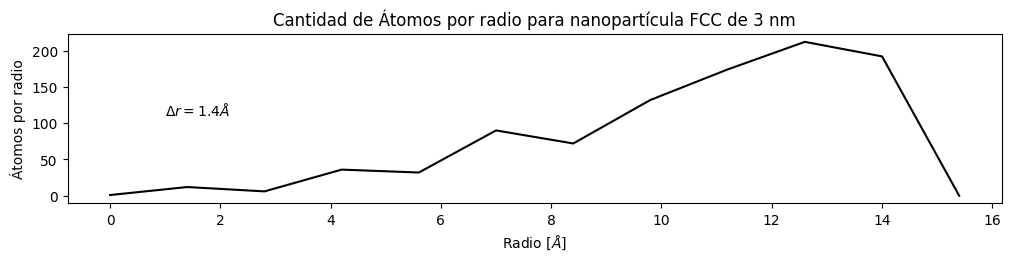

In [11]:
dr = 1.4
radios, fracc, conteo_total, conteo_interes = myplt.dump_fracc_atpr(atpos,'Pt',dr)
fig, ax =plt.subplots(figsize=(10,2.5), layout='constrained')
ax.plot(radios, conteo_total, label=('Atomos por radio'), color = 'black')
ax.set_xlabel('Radio [$\\AA$]')
ax.set_ylabel('Átomos por radio')
ax.set_title('Cantidad de Átomos por radio para nanopartícula FCC de 3 nm')
ypos_text = max(conteo_total)/2
ax.text(1,ypos_text,f'$\Delta r = {dr} \AA$', va='bottom')
#ax.legend()
plt.show()

## Aquí se hace el PDF y la gráfica


In [21]:
import PDF.runner as pdf
pdf.run_pdf_noMD(f'{name[:-4]}.xyz', dir_actual, 1600,0.02,9,9)

c:\Users\guill\OneDrive\Documentos\Tesis\Proyect\02_23_2024_crystal_structures\FCC

         959  atomos       459361  pares 
 Rango de distancias    2.77499771     -   29.8876629    
 Distancias promedio    15.5563717    
 Factor de normalizacion    35991.2656    



Hacemos la gráfica PDF

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


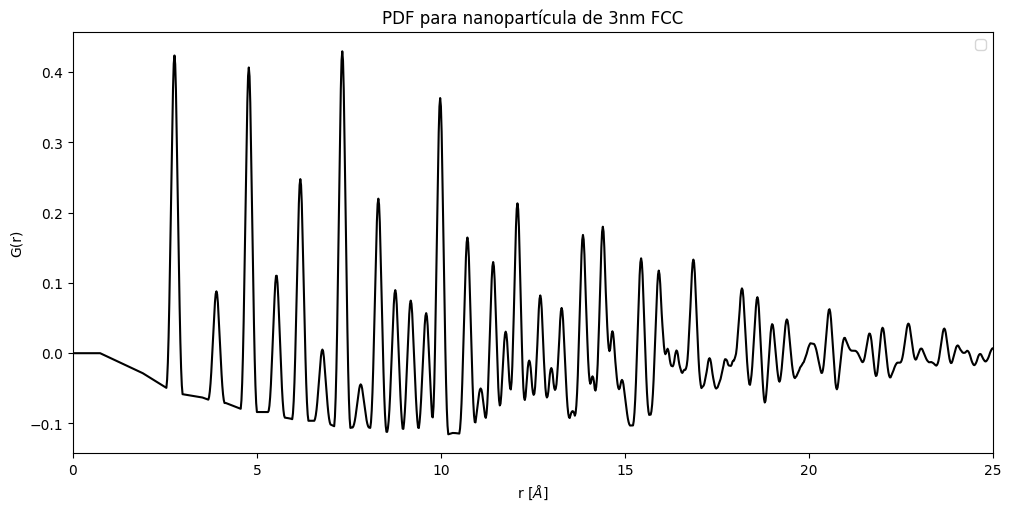

In [23]:
import pandas as pd
import matplotlib.pyplot as plt


df_FCC= pd.read_csv(f'{name[:-4]}.txt', sep='\s+')

fig, ax =plt.subplots(figsize=(10,5), layout='constrained')
ax.plot(df_FCC['#r(A)'], df_FCC['G(r)'], color = 'black')


ax.set_xlabel('r [$\\AA$]')
ax.set_xlim([0,25])
ax.set_ylabel('G(r)')
ax.set_title('PDF para nanopartícula de 3nm FCC')
#ax.grid('True', linestyle='-')
ax.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


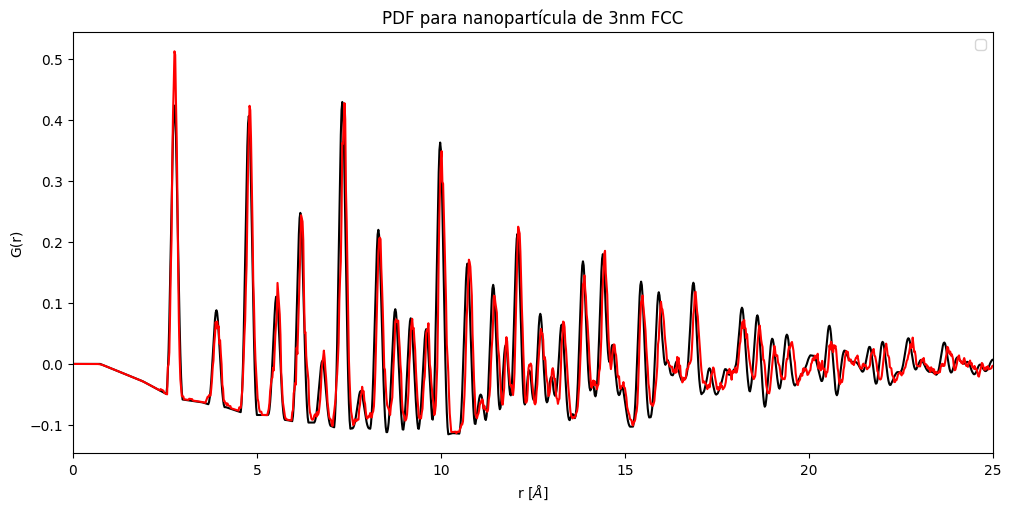

In [22]:
import pandas as pd
import matplotlib.pyplot as plt


df_FCC= pd.read_csv(f'{name[:-4]}.txt', sep='\s+')
df_Pt= pd.read_csv('../../03_15_2024_Pt_Ni_rand_dist/Pt_100/Pt-FCC_d.txt', sep='\s+')

fig, ax =plt.subplots(figsize=(10,5), layout='constrained')
ax.plot(df_FCC['#r(A)'], df_FCC['G(r)'], color = 'black')
ax.plot(df_Pt['#r(A)'], df_Pt['G(r)'], color = 'red')

ax.set_xlabel('r [$\\AA$]')
ax.set_xlim([0,25])
ax.set_ylabel('G(r)')
ax.set_title('PDF para nanopartícula de 3nm FCC')
#ax.grid('True', linestyle='-')
ax.legend()
plt.show()